<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/20230919_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST 모델 구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/mnist_train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


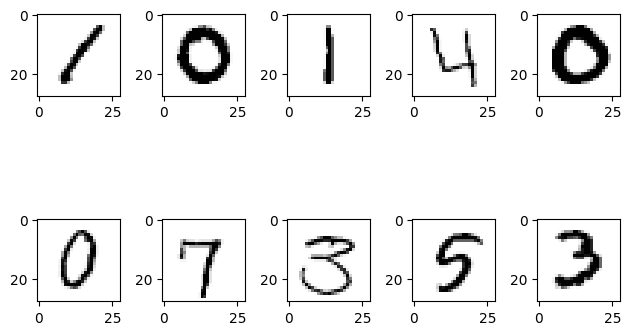

In [2]:
# 이미지 확인

img_data = df.drop('label', axis = 1, inplace = False).values

fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [7]:
# 결측치 무
# 이상치 무
# 정규화 진행

x_data = df.drop('label', axis = 1, inplace = False).values
t_data = df['label'].values.reshape(-1, 1)   # reshape는 x_data는 이미 2차원이라 맞춰 주는거


from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)

x_data_norm = scaler_x.transform(x_data)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape = (784, )))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate = 1e-2), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_data_norm, t_data, epochs = 100, verbose = 1, validation_split = 0.3)


Epoch 1/100
919/919 [==============================] - 3s 3ms/step - loss: 0.3892 - accuracy: 0.8866 - val_loss: 0.3582 - val_accuracy: 0.9010
Epoch 2/100
919/919 [==============================] - 3s 3ms/step - loss: 0.3234 - accuracy: 0.9093 - val_loss: 0.3532 - val_accuracy: 0.9046
Epoch 3/100
919/919 [==============================] - 3s 4ms/step - loss: 0.3097 - accuracy: 0.9141 - val_loss: 0.3162 - val_accuracy: 0.9141
Epoch 4/100
919/919 [==============================] - 4s 4ms/step - loss: 0.3064 - accuracy: 0.9158 - val_loss: 0.3669 - val_accuracy: 0.9022
Epoch 5/100
919/919 [==============================] - 2s 3ms/step - loss: 0.2963 - accuracy: 0.9171 - val_loss: 0.3530 - val_accuracy: 0.9100
Epoch 6/100
919/919 [==============================] - 2s 3ms/step - loss: 0.2889 - accuracy: 0.9209 - val_loss: 0.3455 - val_accuracy: 0.9122
Epoch 7/100
919/919 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.9209 - val_loss: 0.3473 - val_accuracy: 0.9120